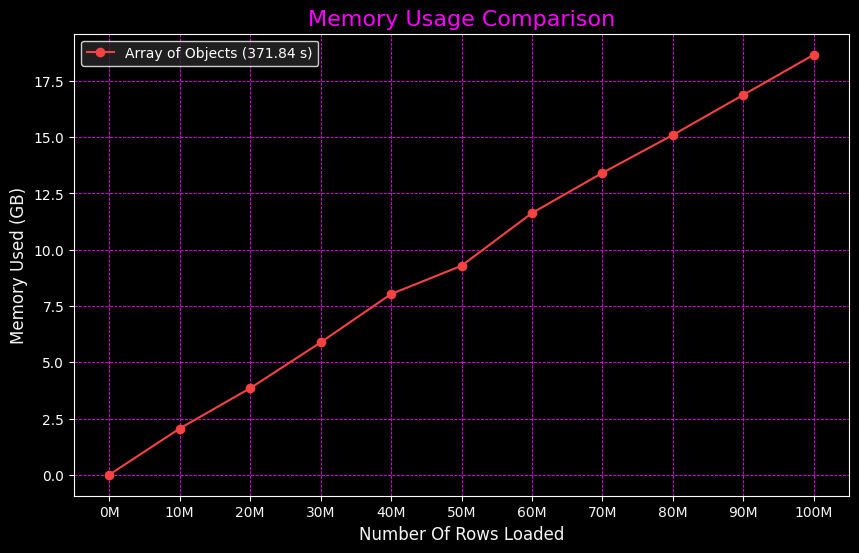

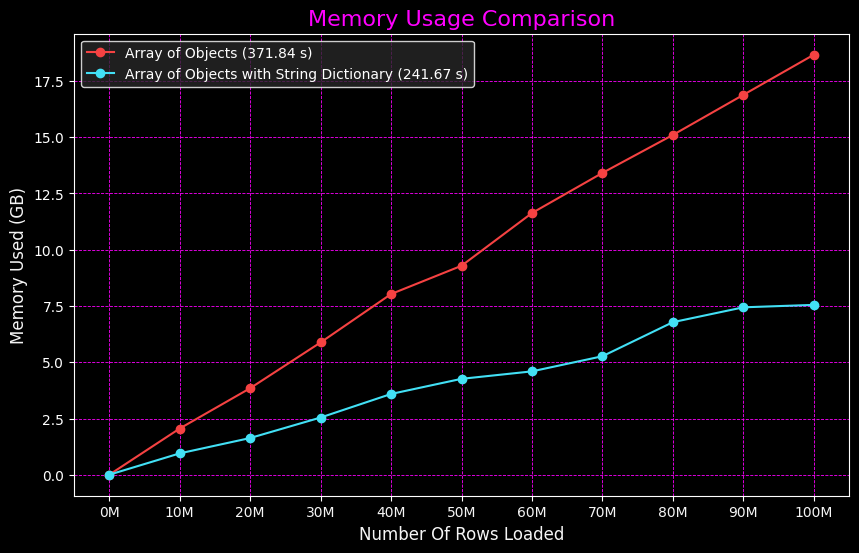

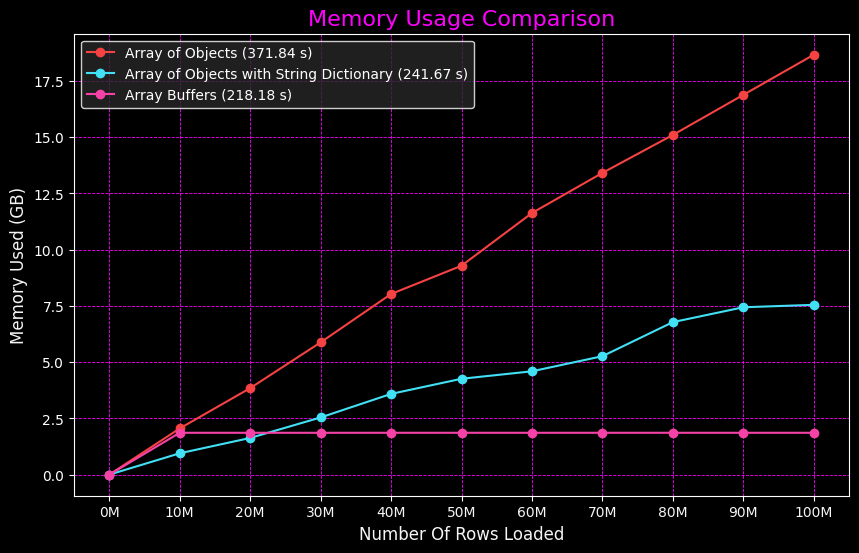

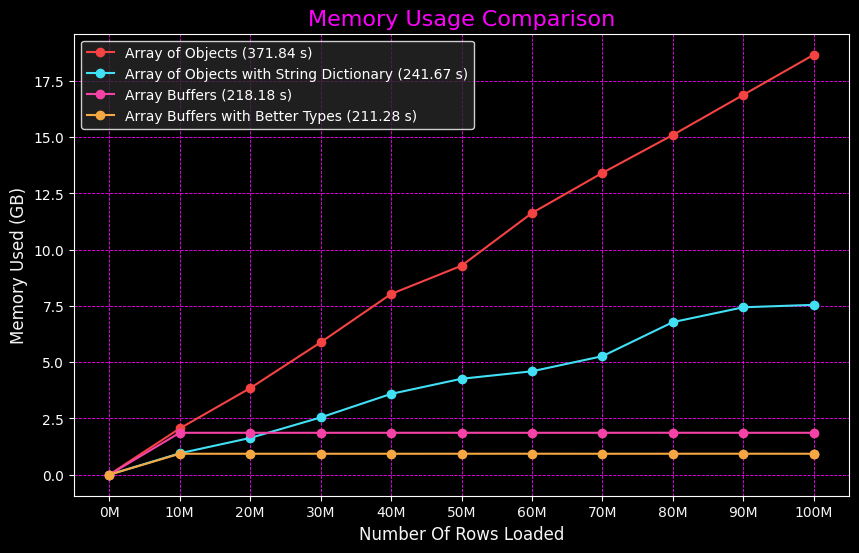

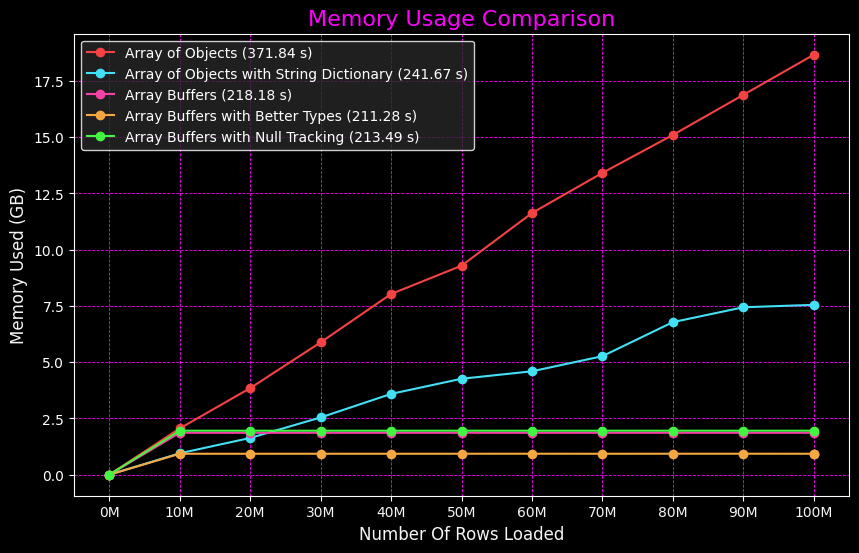

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load duration from a text file and return it in seconds
def load_duration(file_path):
    with open(file_path, 'r') as file:
        return float(file.read().strip()) / 1000  # Convert milliseconds to seconds

# Load the CSV files
stats_dir = "../../frozen_stats"
array_of_objects_df = pd.read_csv(f"{stats_dir}/arrayOfObjects_100000000.csv")
array_of_objects_string_dict_df = pd.read_csv(f"{stats_dir}/arrayOfObjectsStringDictionary_100000000.csv")
array_buffer_df = pd.read_csv(f"{stats_dir}/arrayBuffer_100000000.csv")
array_buffer_better_types_df = pd.read_csv(f"{stats_dir}/arrayBufferBetterTypes_100000000.csv")
array_buffer_with_null_tracking_df = pd.read_csv(f"{stats_dir}/arrayBufferWithNullTracking_100000000.csv")

# Load the corresponding durations
array_of_objects_duration = load_duration(f"{stats_dir}/arrayOfObjects_100000000_duration.txt")
array_of_objects_string_dict_duration = load_duration(f"{stats_dir}/arrayOfObjectsStringDictionary_100000000_duration.txt")
array_buffer_duration = load_duration(f"{stats_dir}/arrayBuffer_100000000_duration.txt")
array_buffer_better_types_duration = load_duration(f"{stats_dir}/arrayBufferBetterTypes_100000000_duration.txt")
array_buffer_with_null_tracking_duration = load_duration(f"{stats_dir}/arrayBufferWithNullTracking_100000000_duration.txt")

# Convert 'heapUsed' and 'arrayBuffers' to GB and 'rows' to millions
array_of_objects_df['heapUsed_GB'] = array_of_objects_df['heapUsed'] / (1024 ** 3)
array_of_objects_df['rows_millions'] = array_of_objects_df['rows'] / 10_000_000

array_of_objects_string_dict_df['heapUsed_GB'] = array_of_objects_string_dict_df['heapUsed'] / (1024 ** 3)
array_of_objects_string_dict_df['rows_millions'] = array_of_objects_string_dict_df['rows'] / 10_000_000

array_buffer_df['arrayBuffers_GB'] = array_buffer_df['arrayBuffers'] / (1024 ** 3)
array_buffer_df['rows_millions'] = array_buffer_df['rows'] / 10_000_000

array_buffer_better_types_df['arrayBuffers_GB'] = array_buffer_better_types_df['arrayBuffers'] / (1024 ** 3)
array_buffer_better_types_df['rows_millions'] = array_buffer_better_types_df['rows'] / 10_000_000

array_buffer_with_null_tracking_df['arrayBuffers_GB'] = array_buffer_with_null_tracking_df['arrayBuffers'] / (1024 ** 3)
array_buffer_with_null_tracking_df['rows_millions'] = array_buffer_with_null_tracking_df['rows'] / 10_000_000

# Filter data to include only rows where 'rows_millions' is a whole number (multiples of 10 million)
array_of_objects_df = array_of_objects_df[array_of_objects_df['rows'] % 10_000_000 == 0]
array_of_objects_string_dict_df = array_of_objects_string_dict_df[array_of_objects_string_dict_df['rows'] % 10_000_000 == 0]
array_buffer_df = array_buffer_df[array_buffer_df['rows'] % 10_000_000 == 0]
array_buffer_better_types_df = array_buffer_better_types_df[array_buffer_better_types_df['rows'] % 10_000_000 == 0]
array_buffer_with_null_tracking_df = array_buffer_with_null_tracking_df[array_buffer_with_null_tracking_df['rows'] % 10_000_000 == 0]

# Apply Synthwave-style customizations
plt.style.use('dark_background')

# Define a list of datasets, their corresponding styles, and durations
datasets = [
    (array_of_objects_df, 'heapUsed_GB', '#f54242', f'Array of Objects ({array_of_objects_duration:.2f} s)'),
    (array_of_objects_string_dict_df, 'heapUsed_GB', '#42e0f5', f'Array of Objects with String Dictionary ({array_of_objects_string_dict_duration:.2f} s)'),
    (array_buffer_df, 'arrayBuffers_GB', '#f542a7', f'Array Buffers ({array_buffer_duration:.2f} s)'),
    (array_buffer_better_types_df, 'arrayBuffers_GB', '#f5a742', f'Array Buffers with Better Types ({array_buffer_better_types_duration:.2f} s)'),
    (array_buffer_with_null_tracking_df, 'arrayBuffers_GB', '#42f542', f'Array Buffers with Null Tracking ({array_buffer_with_null_tracking_duration:.2f} s)')
]

# Create a series of plots
for i, (df, y_col, color, label) in enumerate(datasets, start=1):
    plt.figure(figsize=(10, 6))

    # Plot the previous datasets
    for j in range(i):
        df_prev, y_col_prev, color_prev, label_prev = datasets[j]
        plt.plot(df_prev['rows_millions'], df_prev[y_col_prev], marker='o', linestyle='-', color=color_prev, label=label_prev)

    # Add labels and title
    plt.xlabel('Number Of Rows Loaded', fontsize=12, color='#f5f5f5')
    plt.ylabel('Memory Used (GB)', fontsize=12, color='#f5f5f5')
    plt.title('Memory Usage Comparison', fontsize=16, color='#ff00ff')

    # Set x-axis ticks from 0 to 100 million rows
    plt.xticks(ticks=range(0, 11), labels=[f'{k*10}M' for k in range(11)], fontsize=10, color='#f5f5f5')

    # Add legend
    legend = plt.legend(loc='upper left', fontsize=10)
    legend.get_frame().set_edgecolor('#ffffff')
    legend.get_frame().set_facecolor('#282828')

    # Add grid
    plt.grid(True, which='both', color='#ff00ff', linestyle='--', linewidth=0.6)

    # Save each plot incrementally
    # plt.savefig(f'/home/jack/code/df.ts/slides/memory_usage_comparison_step_{i}.png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()
